In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df=pd.read_csv('height-weight.csv')

In [6]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

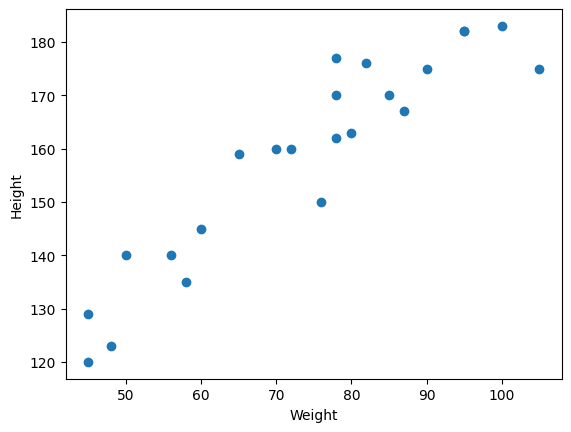

In [7]:
##Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")


In [8]:
##Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


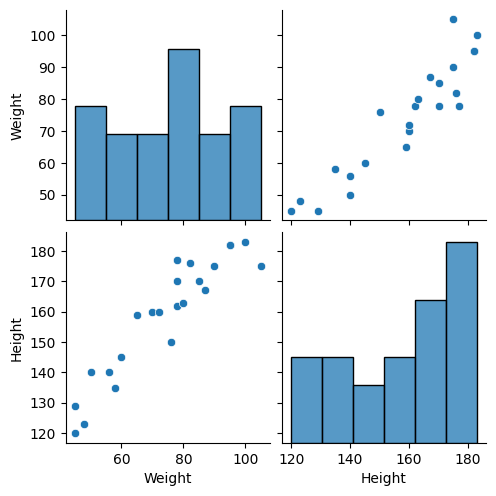

In [9]:
##Seaborn
import seaborn as sns
sns.pairplot(df)

In [10]:
##Divide the dataset into Independent and dependent features
X=df[['Weight']] ## independent features should be data frame or 2 dimensional
y=df['Height'] ###Dependeny this variable can be in series or 1d array

In [11]:
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [12]:
np.array(y).shape

(23,)

In [16]:
# Train Test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
X_train.shape,X_test.shape,X.shape,y.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (23, 1), (23,), (18,), (5,))

In [20]:
##Standardize the trained independent data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [28]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

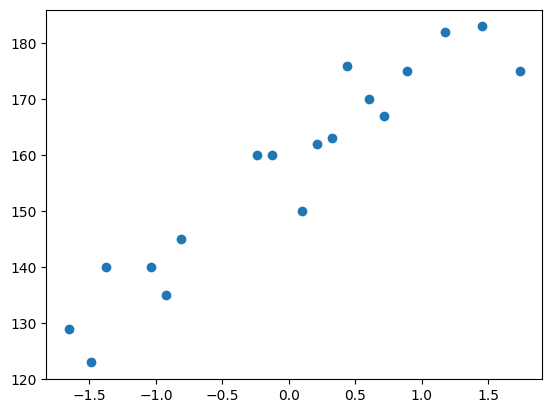

In [29]:
plt.scatter(X_train,y_train)

In [30]:
##APPLY SIMPLE LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

In [31]:
regression=LinearRegression(n_jobs=-1)

In [32]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [34]:
print("The Coefficient or slope of weight is:",regression.coef_)
print("Intercept",regression.intercept_)

The Coefficient or slope of weight is: [17.03440872]
Intercept 157.5


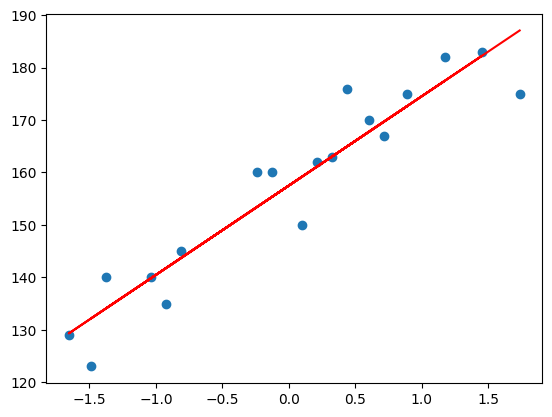

In [37]:
## plot the training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

###Prediction of train data
1.predicted height output=intercept+coef_(Weights)
2.y_pred_train=157.5+17.03(X_train)

###prediction of test data
1.predicted height output=intercept+coef_(Weights)
2.y_pred_test=157.5+17.03(X_test)

In [38]:
## Prediction for test data
y_pred_test=regression.predict(X_test)

In [41]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

In [ ]:
#Performance Metrics
##MSE,MAE,RMSE
##R Square,adjusted R square
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [46]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


In [33]:
pip install statsmodels

  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------- ----------------------- 3.9/9.6 MB 23.4 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 19.3 MB/s  0:00:00
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2

In [47]:
## Display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [48]:
##New data point weight is 80
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\subha\OneDrive\Desktop\vspython\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [51]:
scaled_weight[0]

array([0.32350772])

In [53]:
print("The height prediction for weight 80 kg is",regression.predict(scaled_weight))

The height prediction for weight 80 kg is [163.01076266]


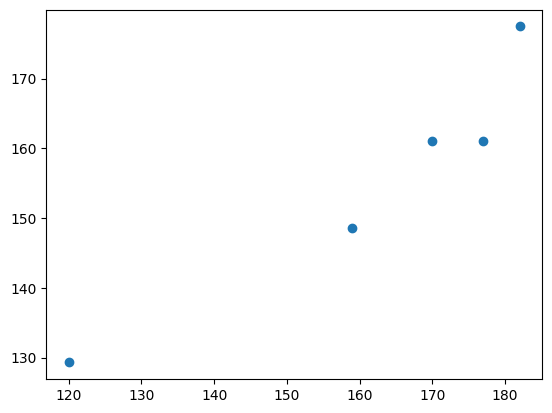

In [54]:
##Assumptions
##plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [55]:
##Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

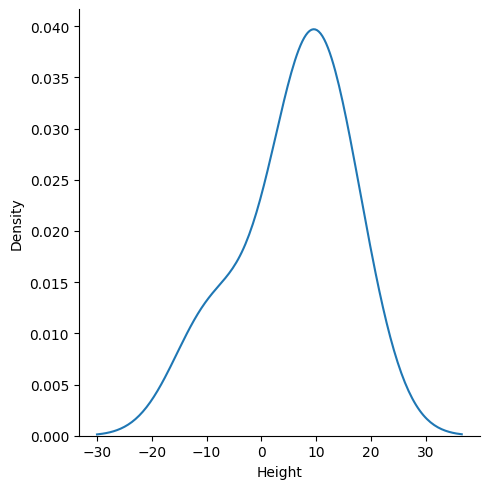

In [59]:
import seaborn as sns
sns.displot(residuals,kind='kde')

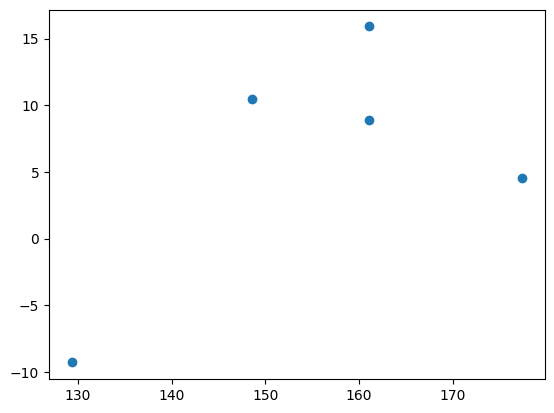

In [60]:
##Scatter plot with respect to prediction and residuals
##uniform distribution
plt.scatter(y_pred_test,residuals)

In [35]:
import statsmodels.api as sm 

In [36]:
## OLS linear regression
model=sm.OLS(y_train,X_train).fit()

In [37]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 05 Dec 2025   Prob (F-statistic):                       0.664
Time:                        16:39:57   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\subha\OneDrive\Desktop\vspython\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])